In [1]:
import gensim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def load_word2vec_model(model_path):
    """
    Carga un modelo Word2Vec entrenado desde un archivo.
    
    Args:
    model_path (str): Ruta al archivo del modelo entrenado.
    
    Returns:
    gensim.models.Word2Vec: El modelo Word2Vec cargado.
    """
    model = gensim.models.Word2Vec.load(model_path)
    return model

def reduce_dimensions(word_vectors, method='pca', n_components=2):
    """
    Reduce la dimensionalidad de los vectores de palabras a 2D para visualización.
    
    Args:
    word_vectors (numpy.ndarray): Vectores de palabras extraídos del modelo Word2Vec.
    method (str): Método de reducción de dimensionalidad ('pca' o 'tsne').
    n_components (int): Número de dimensiones deseadas (2 para visualización en 2D).
    
    Returns:
    numpy.ndarray: Vectores de palabras reducidos a 2D.
    """
    if method == 'pca':
        pca = PCA(n_components=n_components)
        reduced_vectors = pca.fit_transform(word_vectors)
    elif method == 'tsne':
        tsne = TSNE(n_components=n_components, random_state=42)
        reduced_vectors = tsne.fit_transform(word_vectors)
    else:
        raise ValueError("Método no soportado. Usa 'pca' o 'tsne'.")
    
    return reduced_vectors

def plot_embeddings(reduced_vectors, words, title='Word Embeddings Visualization'):
    """
    Crea un gráfico 2D de los vectores de palabras reducidos.
    
    Args:
    reduced_vectors (numpy.ndarray): Vectores de palabras reducidos a 2D.
    words (list of str): Lista de palabras correspondientes a los vectores.
    title (str): Título del gráfico.
    """
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
    
    # Añadir las etiquetas (palabras) al gráfico
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
    
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.grid(True)
    plt.show()

Visualizando embeddings para austen_sense-and-sensibility...


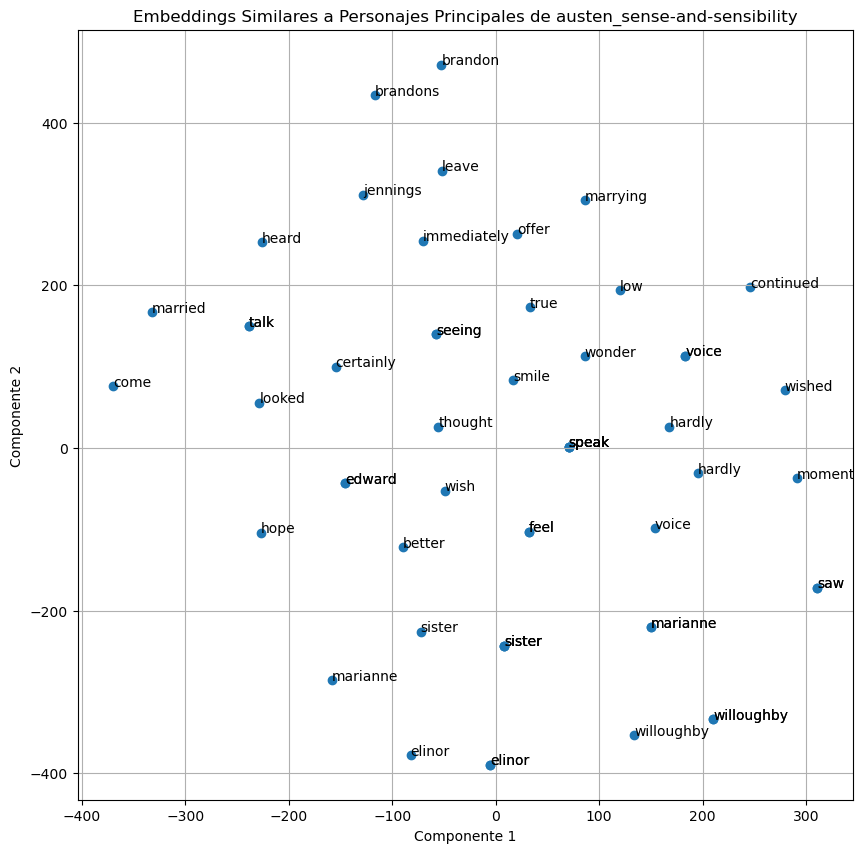

Visualizando embeddings para austen_pride-and-prejudice...


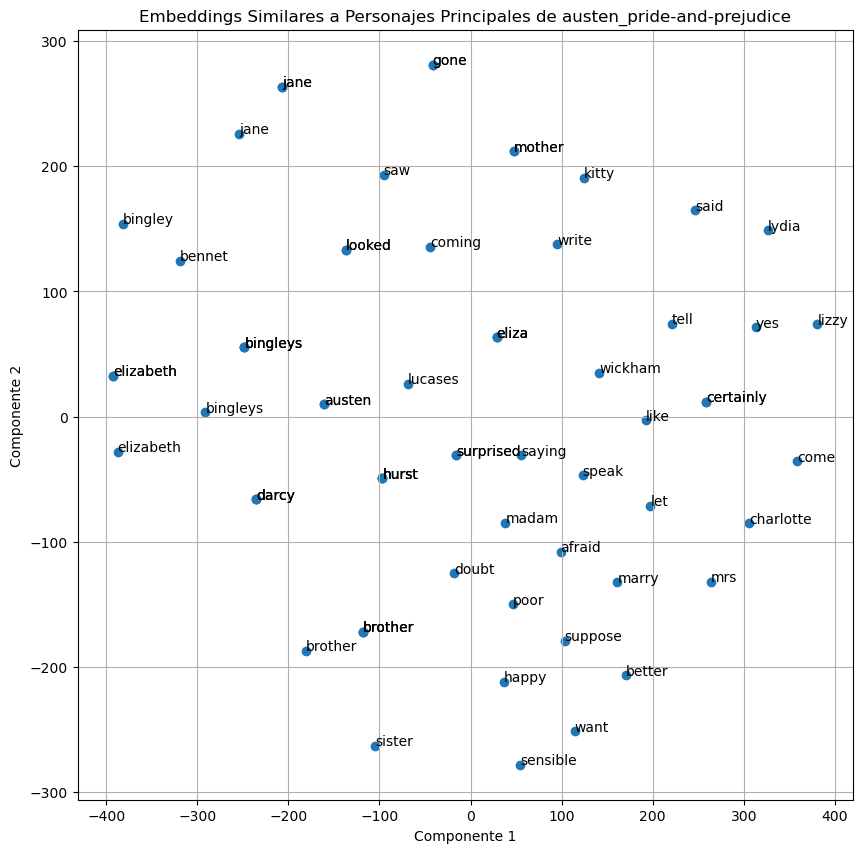

Visualizando embeddings para austen_emma...


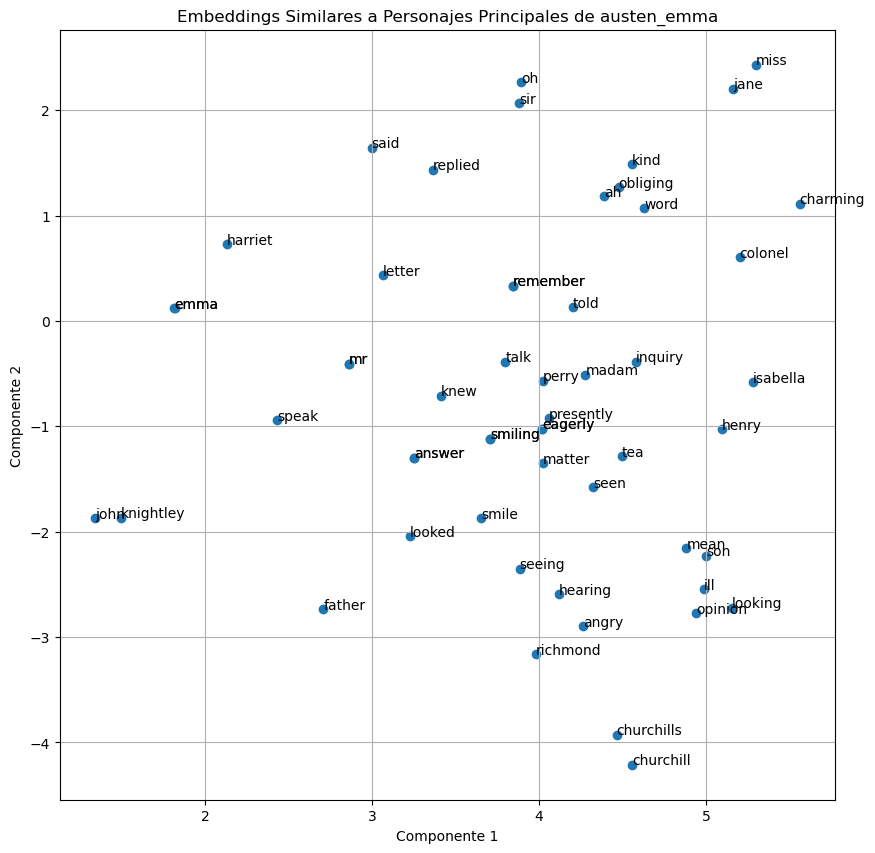

Visualizando embeddings para tolstoy_war-and-peace...


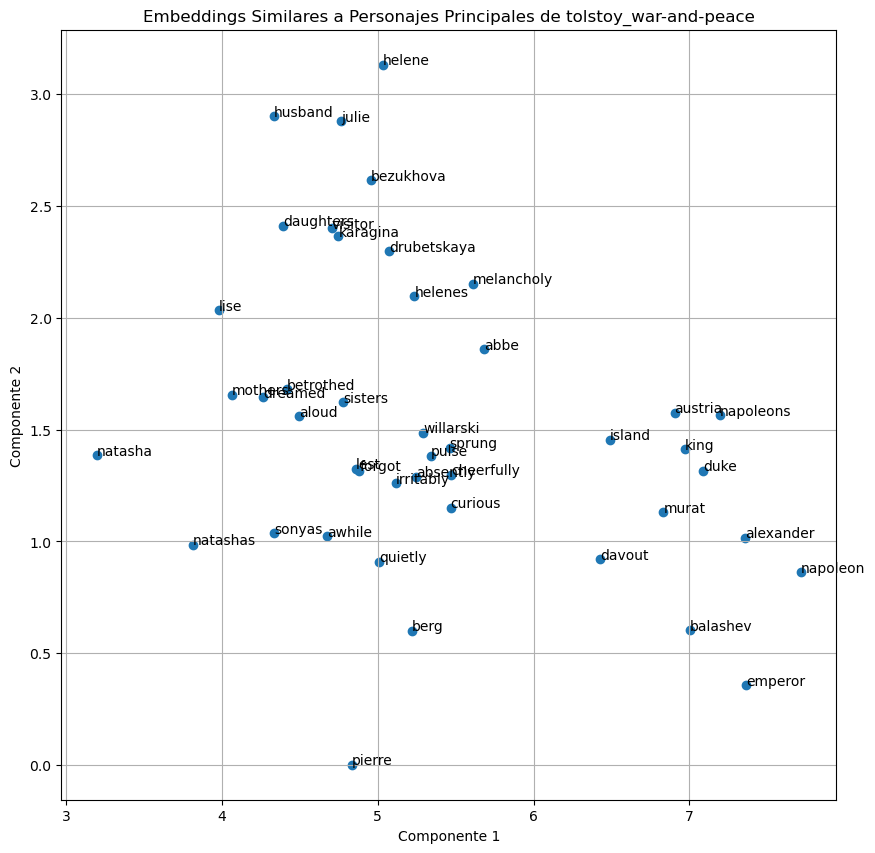

Visualizando embeddings para tolstoy_anna-karenina...


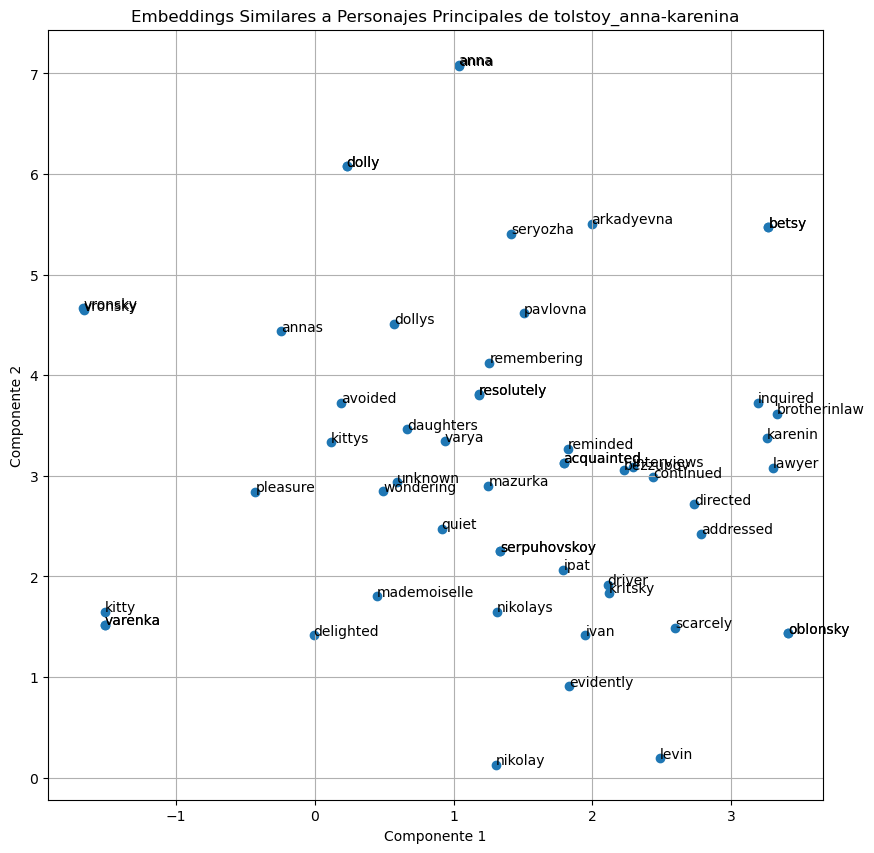

Visualizando embeddings para joyce_dubliners...


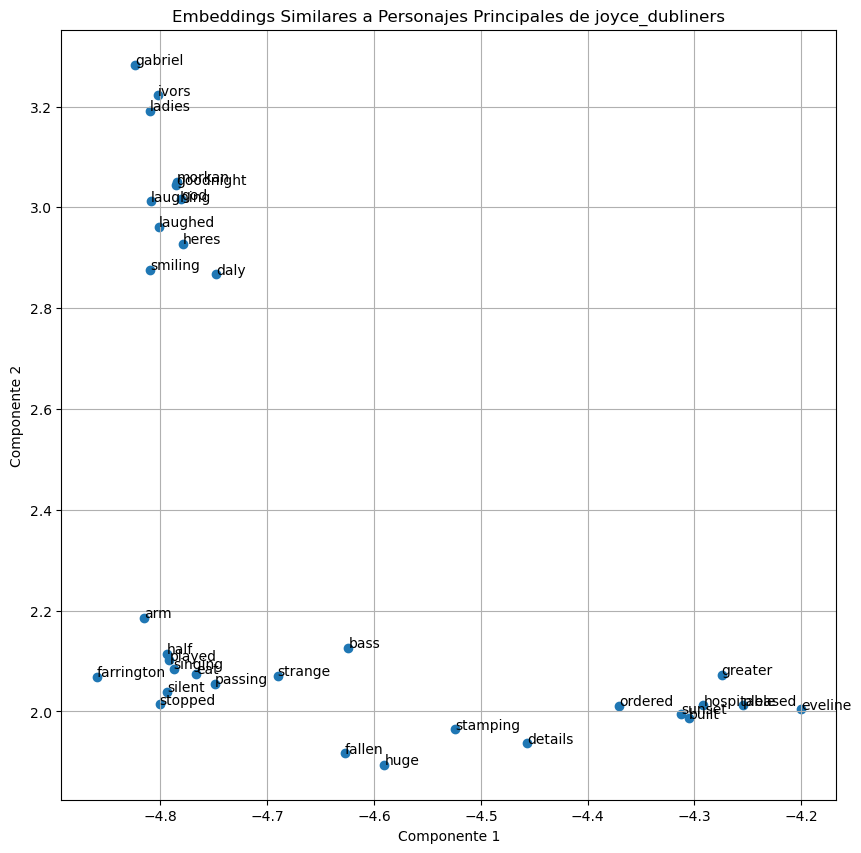

Visualizando embeddings para joyce_ulysses...


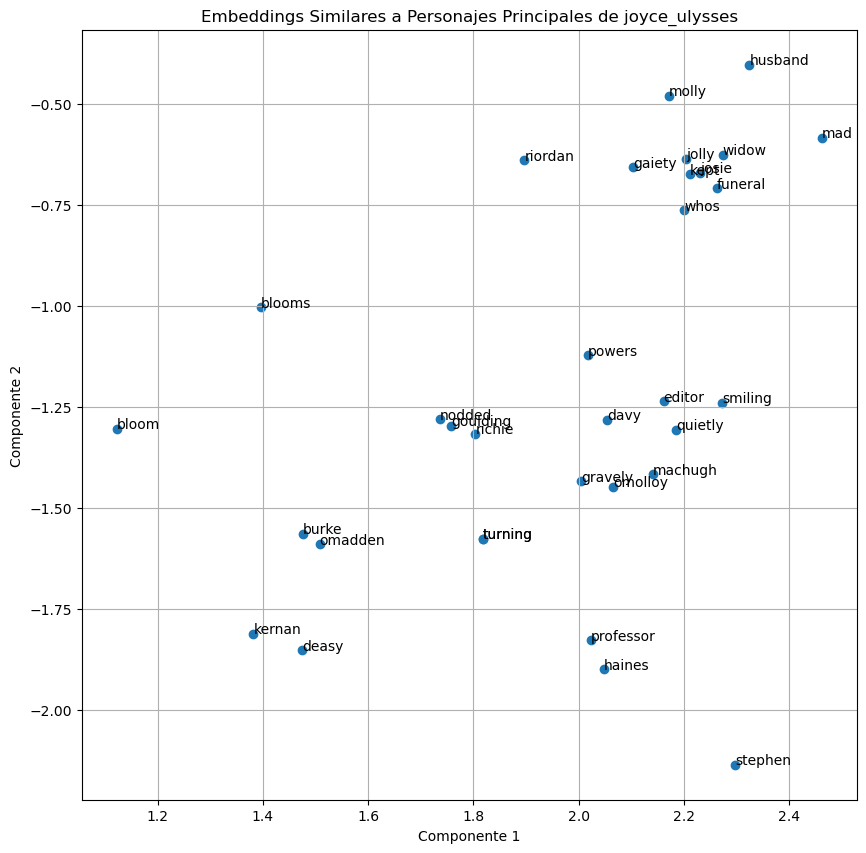

In [3]:
# Ruta a los modelos Word2Vec de 100 dimensiones de cada libro
books_models = {
    'austen_sense-and-sensibility': 'data/models/austen_sense-and-sensibility_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'austen_pride-and-prejudice': 'data/models/austen_pride-and-prejudice_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'austen_emma': 'data/models/austen_emma_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    #'tolstoy_youth': 'data/models/tolstoy_youth_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'tolstoy_war-and-peace': 'data/models/tolstoy_war-and-peace_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'tolstoy_anna-karenina': 'data/models/tolstoy_anna-karenina_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'joyce_dubliners': 'data/models/joyce_dubliners_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    #'joyce_a-portrait-of-the-artist-as-a-young-man': 'data/models/joyce_a-portrait-of-the-artist-as-a-young-man_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model',
    'joyce_ulysses': 'data/models/joyce_ulysses_100_CarlosRaulDeLaRosaPeredoJhonStewarRayoMosqueraMarioGarridoCordoba.model'
}

# Nombres de los personajes principales de cada libro
main_characters = {
    'austen_sense-and-sensibility': ['elinor', 'marianne', 'edward', 'brandon', 'willoughby'],
    'austen_pride-and-prejudice': ['elizabeth', 'darcy', 'jane', 'bingley', 'lydia', 'wickham'],
    'austen_emma': ['emma', 'knightley', 'harriet', 'churchill', 'jane'],
    #'tolstoy_youth': ['nikolai', 'dmitry', 'mother', 'father'],
    'tolstoy_war-and-peace': ['pierre', 'natasha', 'andrei', 'helene', 'bolkonsky', 'napoleon'],
    'tolstoy_anna-karenina': ['anna', 'vronsky', 'levin', 'karenin', 'kitty'],
    'joyce_dubliners': ['gabriel', 'eveline', 'farrington'],
    #'joyce_a-portrait-of-the-artist-as-a-young-man': ['stephen'],
    'joyce_ulysses': ['bloom', 'stephen', 'molly']
}

# Número de palabras similares a visualizar para cada personaje
num_similar_words = 10

# Iterar sobre cada libro y visualizar los embeddings de las palabras más similares a los personajes principales
for book, model_path in books_models.items():
    print(f"Visualizando embeddings para {book}...")

    # Cargar el modelo Word2Vec para el libro actual
    model = load_word2vec_model(model_path)
    
    # Obtener los personajes principales del libro
    characters = main_characters[book]
    
    # Lista para almacenar las palabras más similares y sus vectores
    words = []
    word_vectors = []

    # Encontrar las palabras más similares a cada personaje principal
    for character in characters:
        if character in model.wv:
            similar_words = model.wv.most_similar(character, topn=num_similar_words)
            words.append(character)  # Incluir el personaje en sí
            word_vectors.append(model.wv[character])

            for word, _ in similar_words:
                words.append(word)
                word_vectors.append(model.wv[word])
    
    # Convertir la lista de vectores de palabras a un array de NumPy
    word_vectors_array = np.array(word_vectors)

    # Reducir la dimensionalidad de los vectores a 2D usando t-SNE
    reduced_vectors = reduce_dimensions(word_vectors_array, method='tsne')
    
    # Visualizar los embeddings
    plot_embeddings(reduced_vectors, words, title=f'Embeddings Similares a Personajes Principales de {book}')